# Horn Radio Telescope Spectrum Integration "Example

### Glen Langston, 2022 February 9

This notebook shows examples of using previously averaged hot and cold load observations to study a single days observations. 

The calibration requireds an observation of the sky, which is assumed to be very cold, 10 Kelvins (about -442 Fahrenheit), along with several observations of the ground, to calibrate the measured intensity of hydrogen in the arms of our Milky Way.

In [1]:
# find out your current directory
!pwd
# now add one directory up to find packages 
import sys
sys.path.append("../")

/Users/glangsto/Desktop/Research/jupyter/integrate


In [2]:
# Import the Radio Astronomy Service (RAS) code.
import ephem
import ras
import rasnames

In [3]:
datadir = "/Volumes/jansky/pi16-data-22Jan11"

In [4]:
# get a list of all files in the data directory.  The data are up a directory 

# "data" look in the 'data' directory for the observations
astfiles, countast = rasnames.splitNames(datadir, ".ast", "", doDebug=False)
print("Found  %d sky observations" % (countast))
print("Files: %s to %s " % ( astfiles[0], astfiles[countast-1]))

Found  549 sky observations
Files: /Volumes/jansky/pi16-data-22Jan11/22-01-11T045704.ast to /Volumes/jansky/pi16-data-22Jan11/22-01-12T045337.ast 


In [5]:
# get the hot and cold files just created and "kept" in directory
keepdir = "keep"
hotfiles, count = rasnames.splitNames(keepdir, ".hot", "", doDebug=False)
coldfiles, count = rasnames.splitNames(keepdir, ".ast", "", doDebug=False)

In [6]:
# now look in the list of directories and return the full file names
# This program only lookes for file types given.  The program could be used for any purpuse
# radio astronomy or any other type of input search.
datafiles, count = rasnames.splitNames(datadir, ".ast", "", doDebug=False)

In [7]:
# Now perform actual calibration and plotting of each observation
adate = ras.Plot()
adate.help("-BASE -X 16 -I 600 -V -S 22Jan.txt")
adate.hotfilename = hotfiles[0]
adate.coldfilename = coldfiles[0]


Fitting and subtracking a baseline
Telescope Index: 16
Spectral integration time for averaging:    600.0 s
Plotting intensity versus Velocity
Writing to Summary file: T16-22Jan.txt


Hot File keep/T16-22-01-10T082736.hot, Read 2048 channels
Cold File keep/T16-22-01-10T122055.ast, Read 2048 channels
Found 1 Cold Sky Obs.; Min El =    80.0, Low Gal Lat:    40.0
Median Receiver Temp:  178.52 +/-  0.24 ( 0.36  0.12) (K)
Ploting Intensity versus Velocity
Date: 2022-01-11
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median   X (km/s)  Count 
05:07:33   0.0, 80.0  168.4, 21.7    26.09     0.26     9.979   112500
05:20:39   0.0, 80.0  169.0, 23.8    22.80     0.44    10.291   112500
05:33:46   0.0, 80.0  169.5, 25.9    18.73     0.22    12.251   112500
05:46:52   0.0, 80.0  170.0, 28.1    16.62     0.71    12.558   112500
05:59:59   0.0, 80.0  170.4, 30.2    13.96     0.53     5.438   112500
06:13:05   0.0, 80.0  170.7, 32.4    11.69     0.26     6.551   112500
06:26:11   0.0, 80.0  170.9, 34.6    10.10     0.22     5.175   112500
06:39:18   0.0, 80.0  170.9, 36.7     8.87     0.30     2.957   112500
06:52:24   0.0, 80.0  170.9, 38.9     7.86     0.20     4.014   112500
07

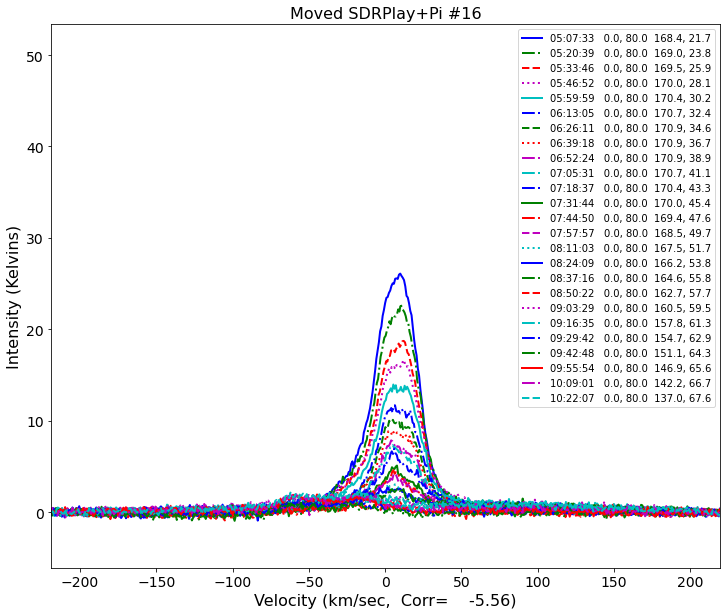

In [8]:
# tell the software to subtract a baseline
# The -X argument is used to distinguish telescopes if you have several

# now re-plot
adate.tsys(datafiles)

# Congratulations!
## You've used the Calibration spectra from your observations.
## Then you've calibrated each 10 minute block of observations
### Did you notice how much the spectra change in just 10 minutes?